In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sb
from sklearn.impute import SimpleImputer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Determine and visualize the top genes determined by the dimensionality reduction techniques.

# Set-up

In [0]:
## Upload files to colab first
test_data = pd.read_csv('test_data_processed.csv')
train_data = pd.read_csv('train_data_processed.csv')
test_lbl = pd.DataFrame(np.load('test_labels.csv.npy', allow_pickle = True))
train_lbl = pd.DataFrame(np.load('train_labels.csv.npy', allow_pickle = True))
gene_data = pd.read_csv('expression_data.csv')
clinical_data = pd.read_csv('clinical_data.csv')

In [0]:
train_data_lbl = pd.concat([train_data, train_lbl], axis = 1)
test_data_lbl = pd.concat([test_data, test_lbl], axis = 1)

train_data_lbl.columns.values[-1] = 'Grade'
test_data_lbl.columns.values[-1] = 'Grade'

processed_data = pd.concat([train_data_lbl, test_data_lbl], axis = 0)

In [7]:
processed_data = processed_data.sort_values(['Grade'])
processed_data.index = range(1, 326)

processed_data.head()

0         2         4         7  ...     24316     24317     24323   Grade
1  4.216178  8.112087  0.743007  1.502574  ...  1.596617  2.517447  5.719885  WHO II
2  3.492268  6.558098  1.204692  0.826887  ...  1.079161  2.036092  5.255501  WHO II
3  4.025552  7.656036  2.207602  0.887445  ...  1.439584  1.939597  5.635432  WHO II
4  2.327493  7.469541  1.531726  0.554627  ...  1.454685  2.451638  4.958259  WHO II
5  4.659819  5.615786  3.985789  0.156355  ...  1.164529  1.114776  5.501457  WHO II

[5 rows x 8676 columns]

In [8]:
means = processed_data.groupby(['Grade']).mean()
means

0         2         4  ...     24316     24317     24323
Grade                                  ...                              
WHO II   3.072784  6.973857  1.325422  ...  1.615458  2.403526  5.606075
WHO III  3.335373  7.483027  0.203360  ...  2.153295  3.288979  6.275362
WHO IV   3.815512  7.742453 -0.312663  ...  2.547849  3.821494  6.864958

[3 rows x 8675 columns]

In [9]:
std = processed_data.groupby(['Grade']).std()
std

0         2         4  ...     24316     24317     24323
Grade                                  ...                              
WHO II   1.050752  0.748294  1.215149  ...  0.583802  0.925695  0.622354
WHO III  1.110082  1.027338  1.945654  ...  0.666077  1.152496  1.077426
WHO IV   1.265102  1.068970  1.860719  ...  0.700970  1.101107  0.911960

[3 rows x 8675 columns]

In [10]:
gene_data.head()

Gene_Name  CGGA_1001  CGGA_1006  ...  CGGA_738  CGGA_759  CGGA_D30
0      A1BG      12.64       7.03  ...      4.64      7.07     31.41
1  A1BG-AS1       2.12       1.13  ...      0.85      1.99      2.65
2       A2M     452.92     106.54  ...    160.70    263.66    192.54
3   A2M-AS1       3.30       0.13  ...      0.38      0.48      2.51
4     A2ML1       0.04       0.33  ...      3.33      0.60      3.86

[5 rows x 326 columns]

In [11]:
clinical_data.head()

CGGA_ID PRS_type  ... IDH_mutation_status 1p19q_codeletion_status
0  CGGA_1001  Primary  ...            Wildtype               Non-codel
1  CGGA_1006  Primary  ...            Wildtype               Non-codel
2  CGGA_1007  Primary  ...            Wildtype               Non-codel
3  CGGA_1011  Primary  ...            Wildtype               Non-codel
4  CGGA_1015  Primary  ...            Wildtype               Non-codel

[5 rows x 12 columns]

# Top Genes on Run #1

## Get Gene Names

In [0]:
top_indices = [  261,   521 ,  871 ,  882 , 2952 , 3682,  3683 , 3684 , 3685,  3686,  3687,  3689,
  4517,  4673,  6485,  6508,  6654,  7525,  7826,  8039,  8588,  9050,  9093,  9337,
  9573,  9642,  9689,  9821,  9955, 10506, 11463, 11467, 11635, 11725, 11950, 12604,
 12612, 12779, 13046, 13171, 13423, 13445, 13466, 13467, 13608, 13693, 13934, 13947,
 14474, 14475, 14571, 15235, 15392, 15822, 16485, 16969, 17534, 17684, 17770, 17970,
 19256, 19818, 20062, 21273, 21918, 22069, 22071, 22119, 22603, 22667, 23000, 23064,
 23067, 23378, 23678, 23786, 23820, 24122]

In [13]:
gene_names = []
for i in top_indices:
    gene_names.append(gene_data.iloc[i, 0])
gene_names

['AC005754.7',
 'AC017048.3',
 'AC132217.4',
 'AC136297.1',
 'C1QL4',
 'CCL3',
 'CCL3L1',
 'CCL3L3',
 'CCL4',
 'CCL4L1',
 'CCL4L2',
 'CCL8',
 'COL3A1',
 'CPXM2',
 'EGR2',
 'EIF1AY',
 'EN1',
 'FKBP1C',
 'GAL',
 'GIPR',
 'H19',
 'HOXA5',
 'HPR',
 'IGF2',
 'IP6K3',
 'ISL2',
 'ITIH2',
 'KCNA5',
 'KDM5D',
 'LILRB5',
 'MEOX2',
 'MEPE',
 'MIR4426',
 'MMP7',
 'MSMP',
 'NKX6-1',
 'NLGN4Y',
 'NPW',
 'OGN',
 'OSM',
 'PCDHA4',
 'PCDHB5',
 'PCDHGB6',
 'PCDHGB7',
 'PDYN',
 'PGAM2',
 'PLA2G2A',
 'PLAC8',
 'PRKY',
 'PRLHR',
 'PRSS35',
 'RET',
 'RIT2',
 'RP11-1100L3.8',
 'RP11-262H14.3',
 'RP11-363E6.4',
 'RP11-495P10.2',
 'RP11-536O18.2',
 'RP11-561I11.3',
 'RP11-64B16.2',
 'RPS4Y1',
 'SFRP2',
 'SLC17A8',
 'TAC1',
 'TMEM200A',
 'TMSB4XP6',
 'TMSB4Y',
 'TNFSF18',
 'TTTY15',
 'TXLNG2P',
 'USP9Y',
 'VEPH1',
 'VGF',
 'XIST',
 'ZFY',
 'ZNF208',
 'ZNF257',
 'ZNF683']

## Plot gene expression by grade

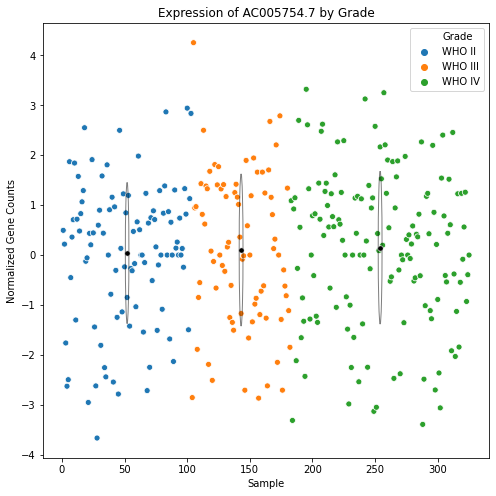

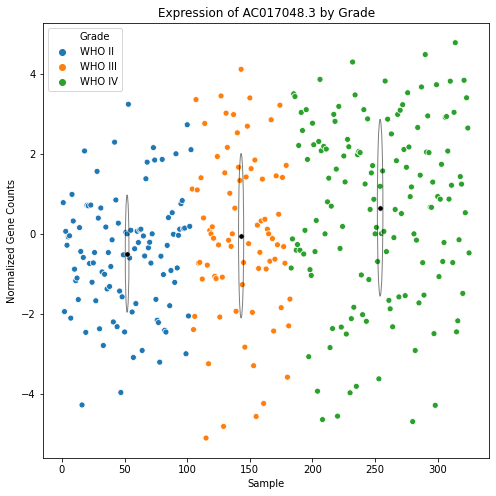

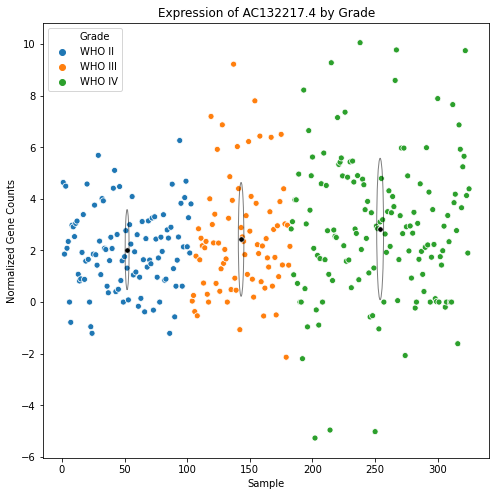

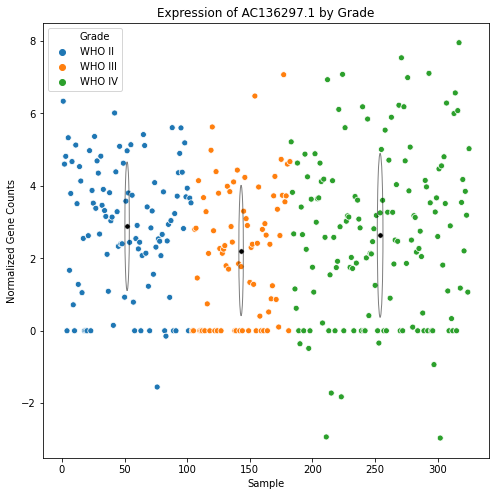

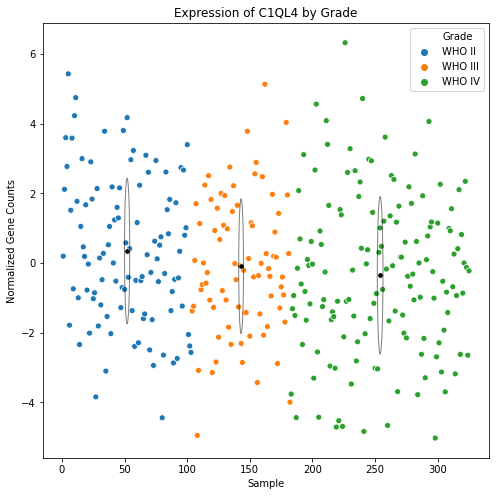

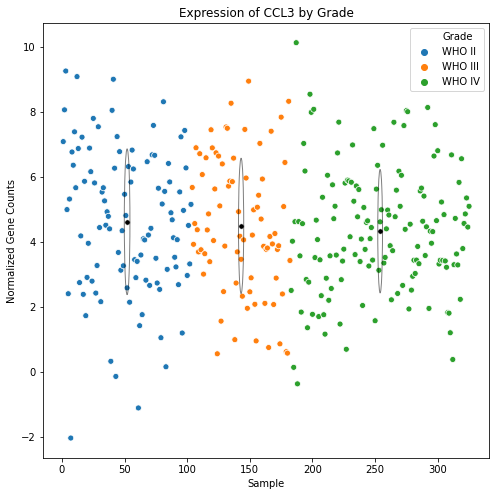

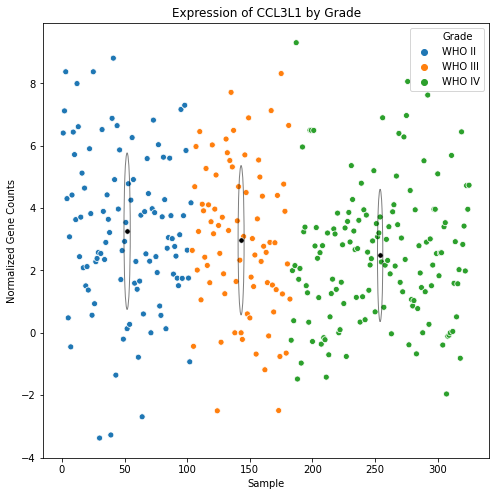

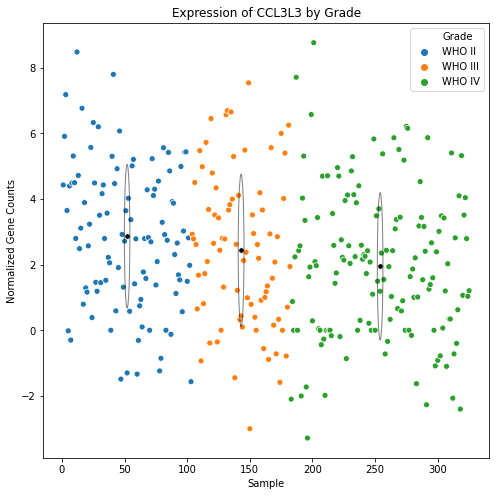

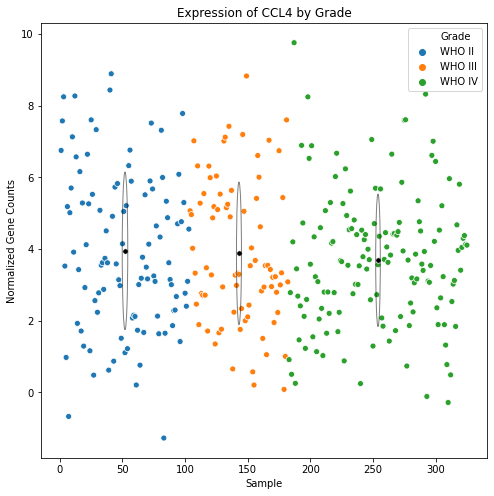

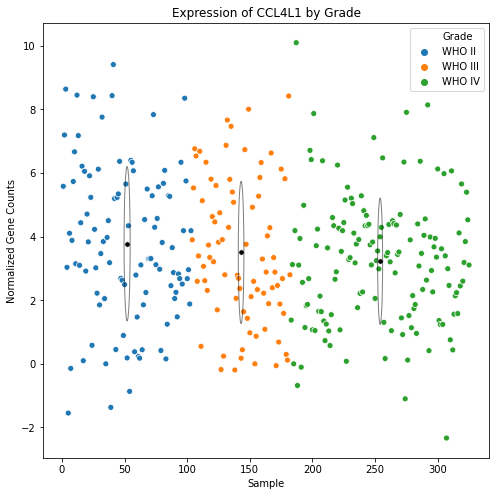

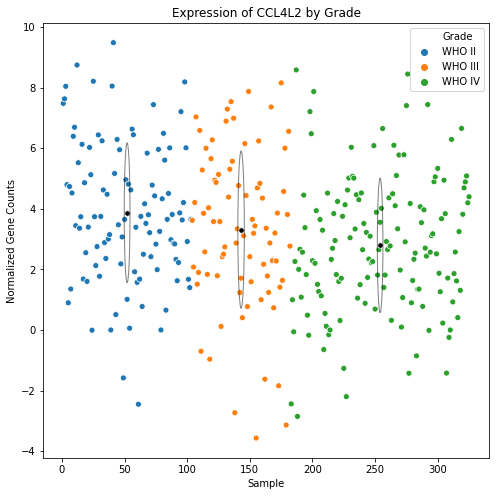

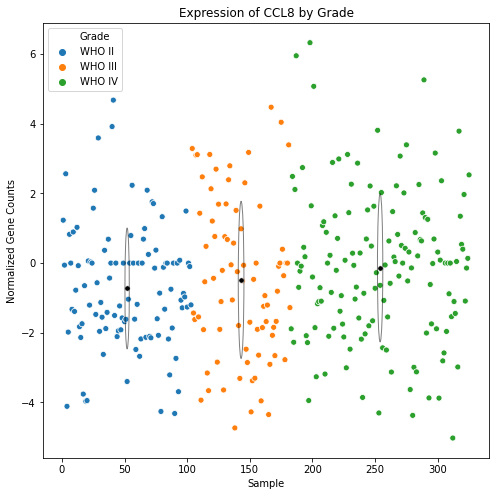

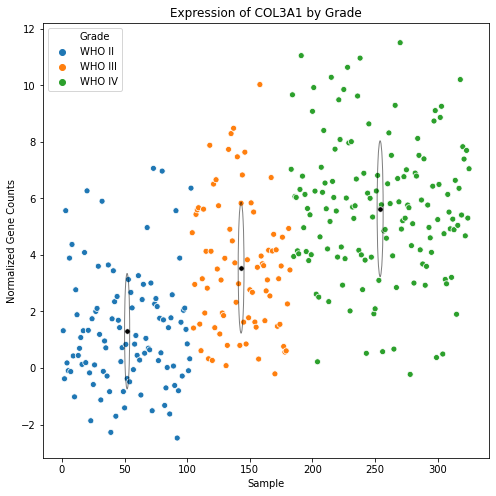

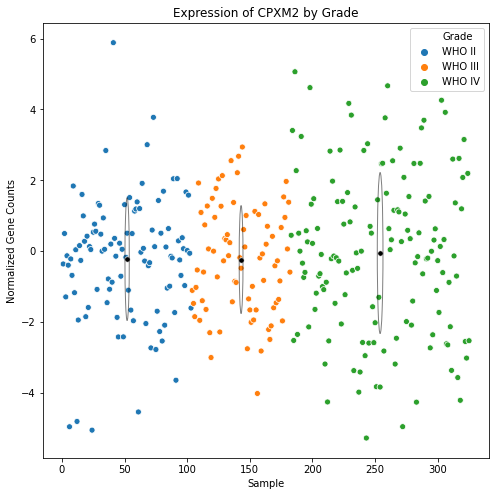

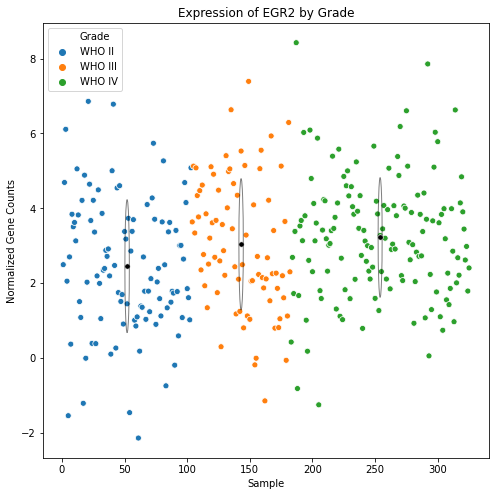

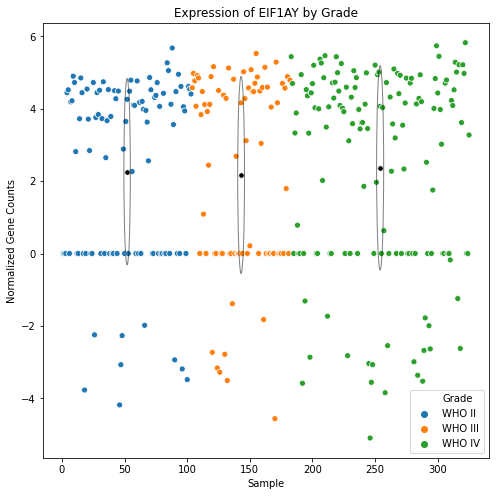

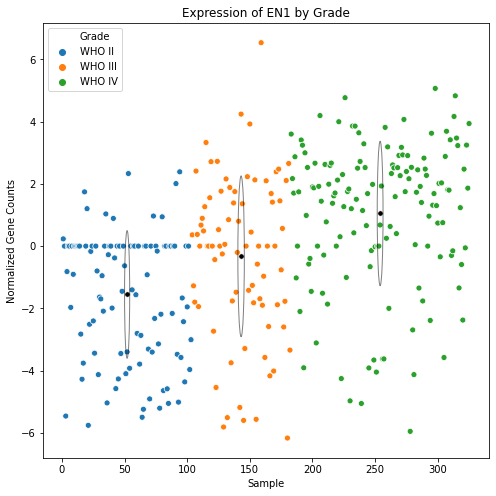

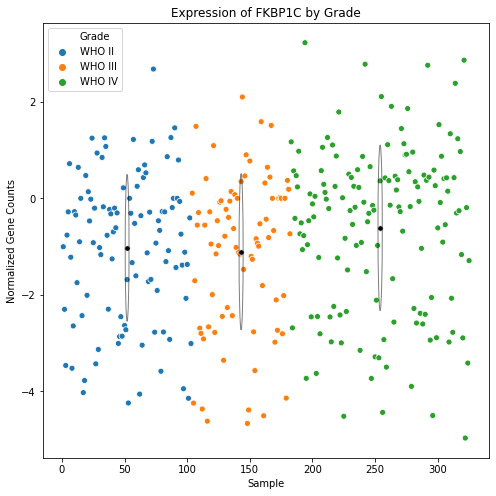

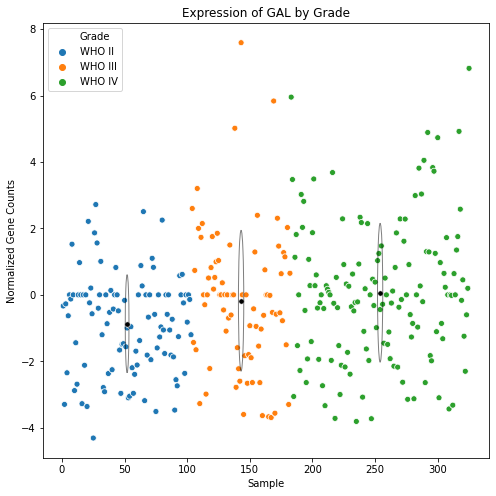

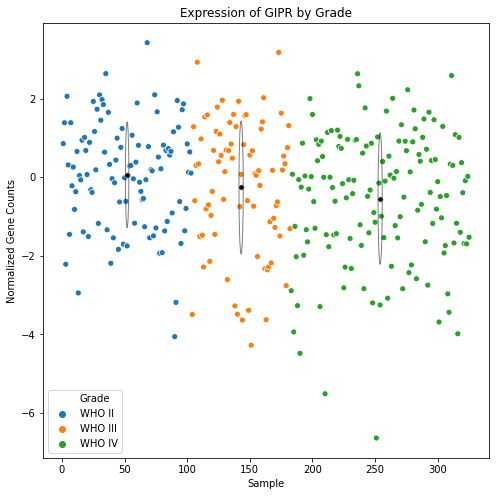

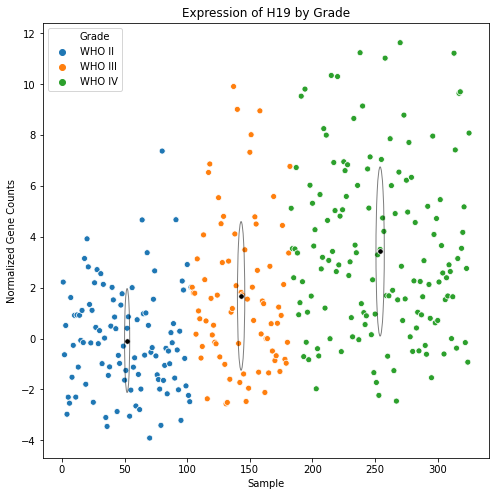

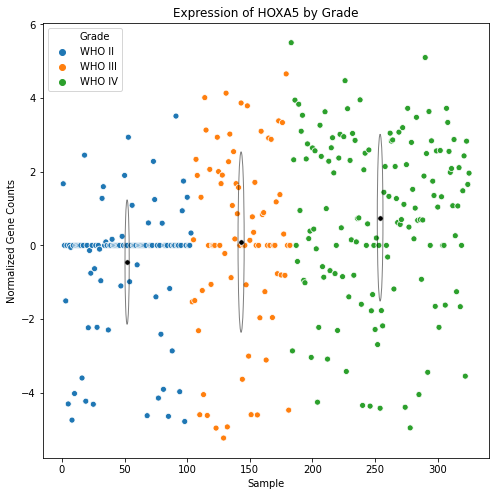

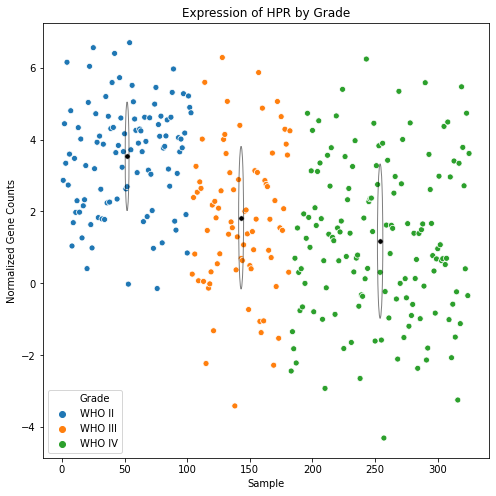

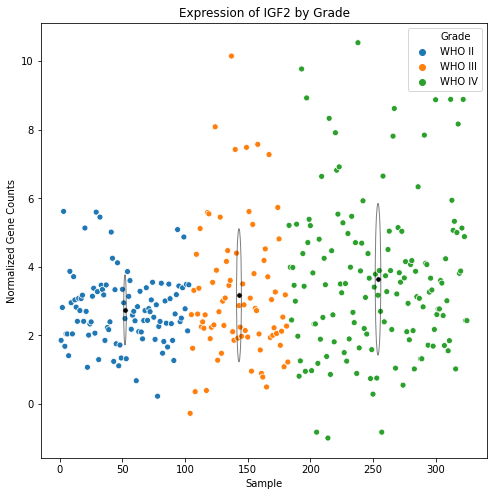

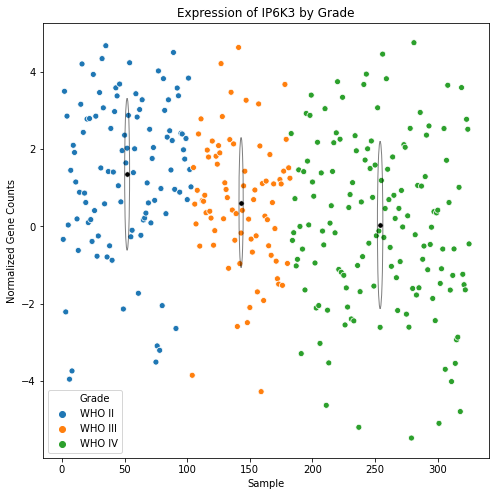

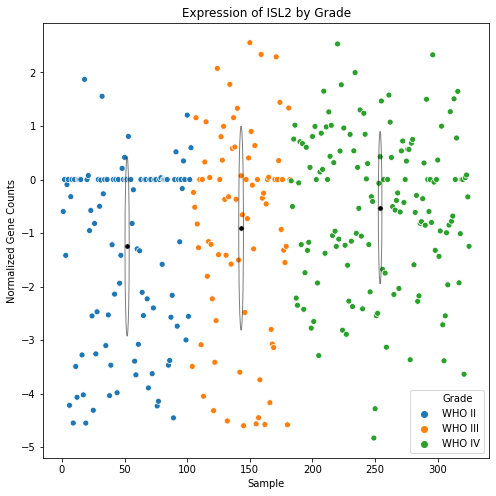

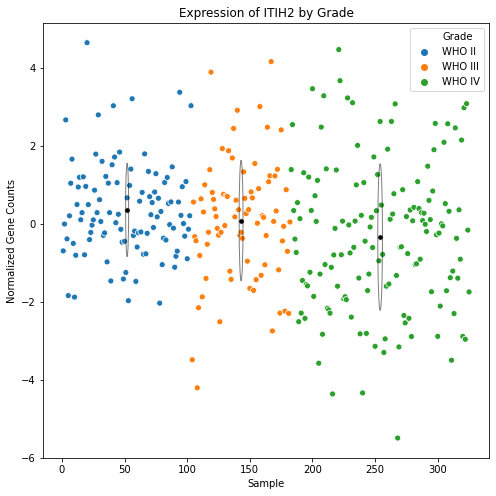

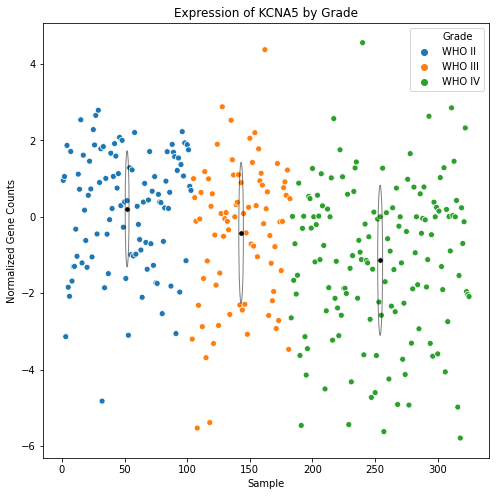

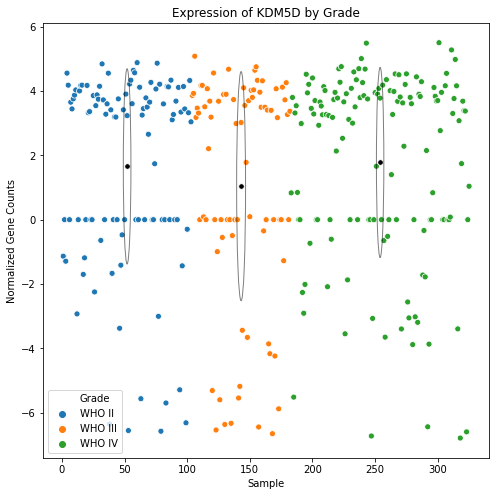

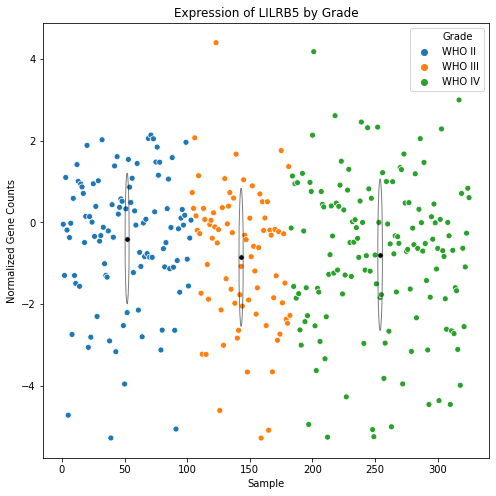

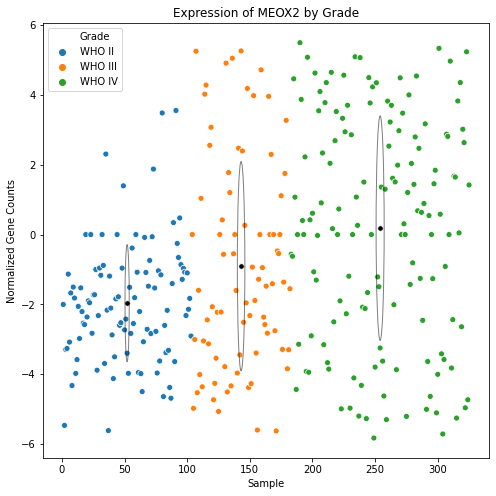

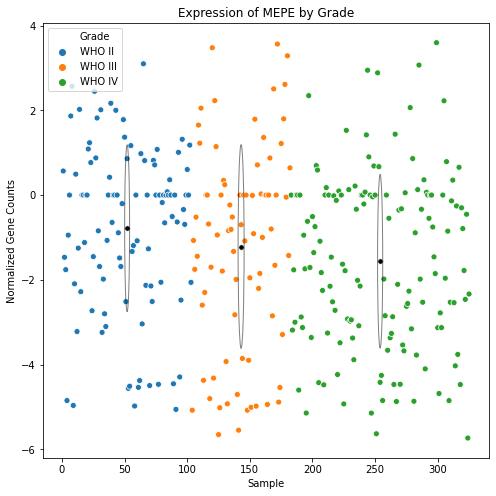

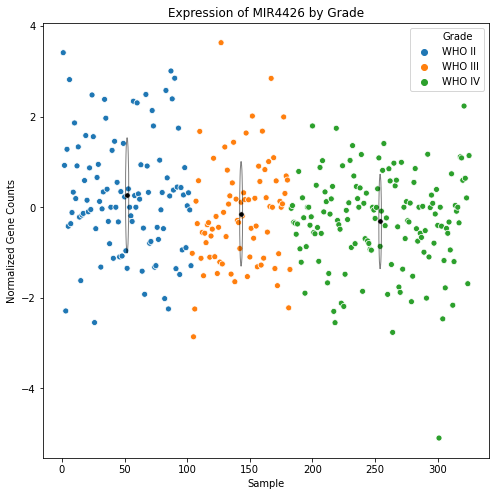

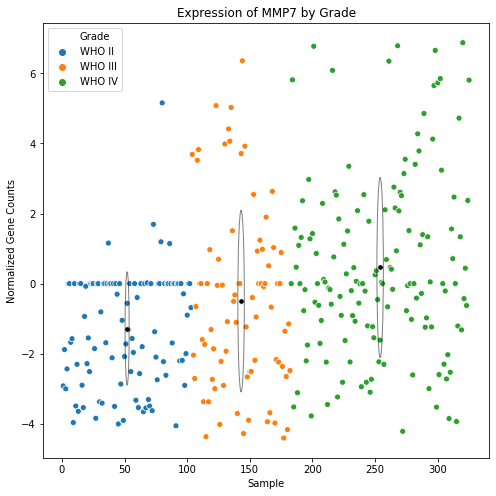

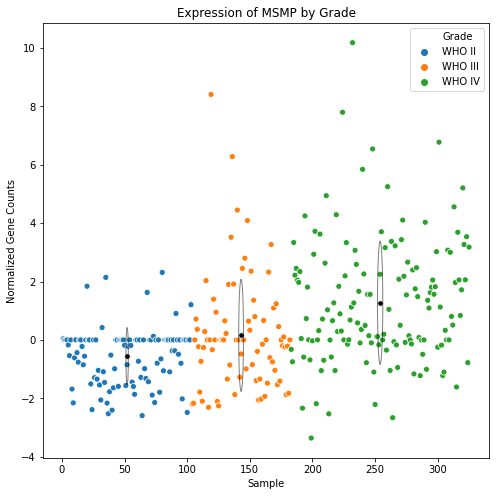

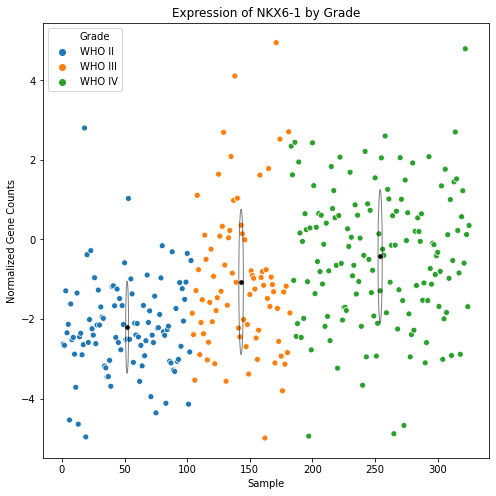

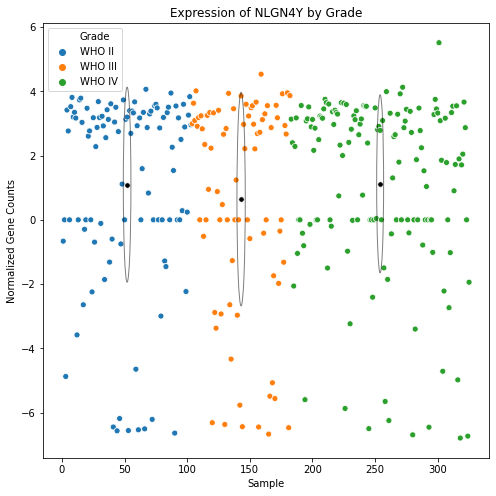

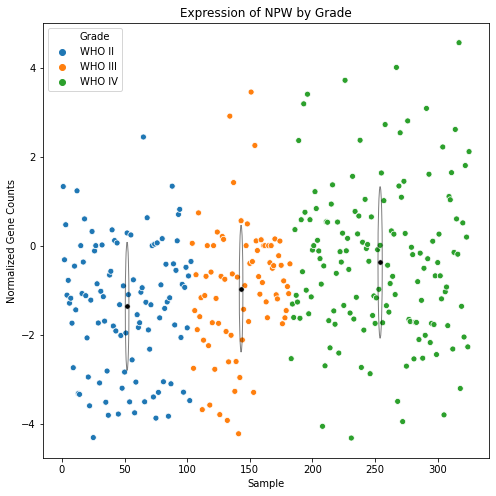

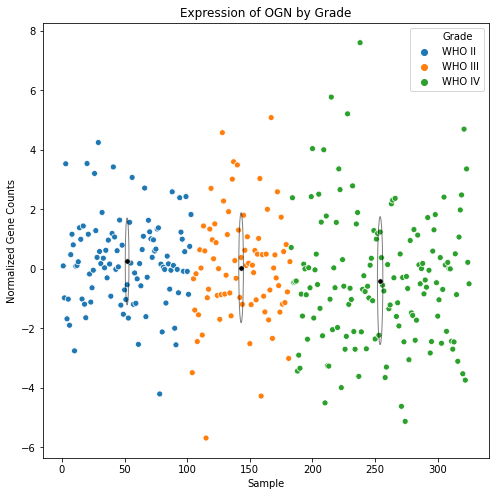

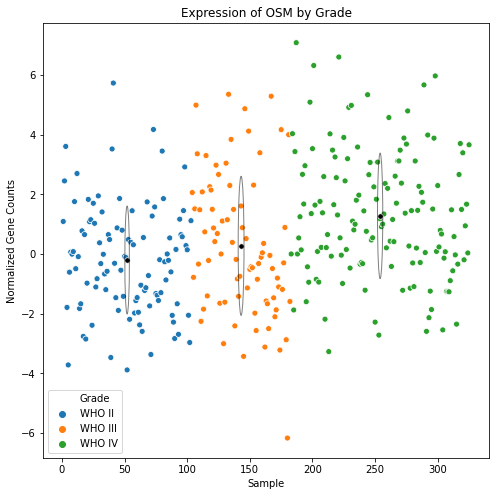

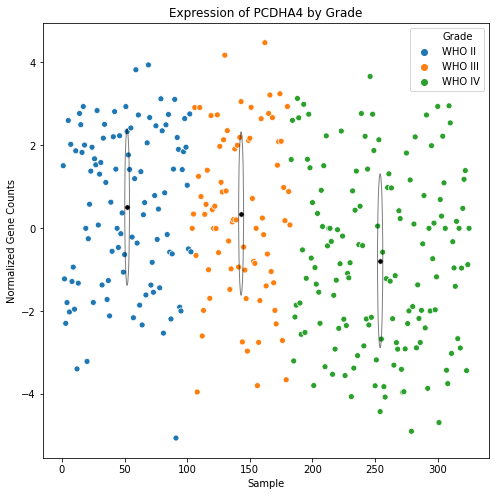

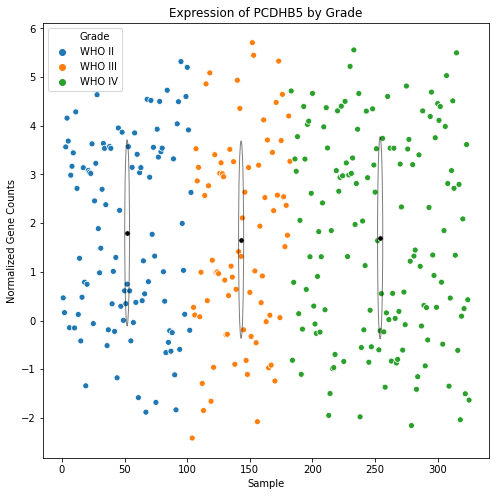

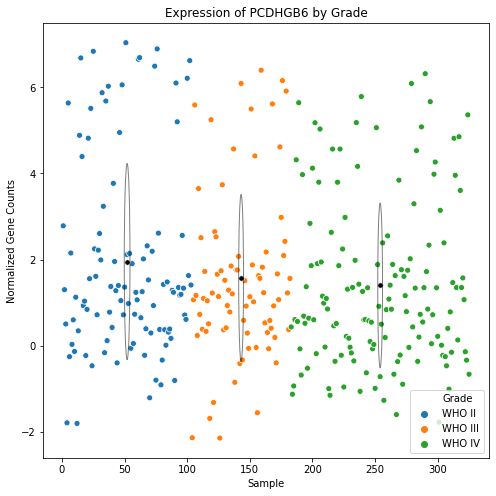

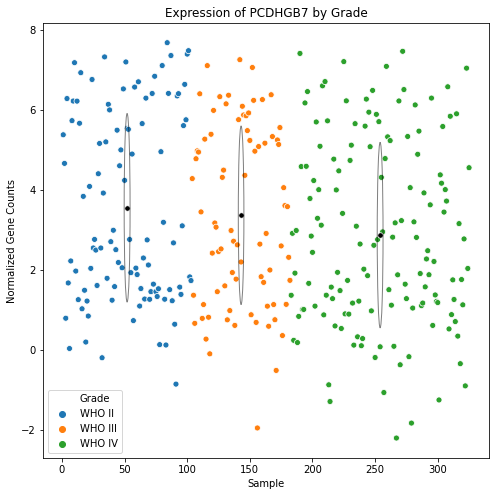

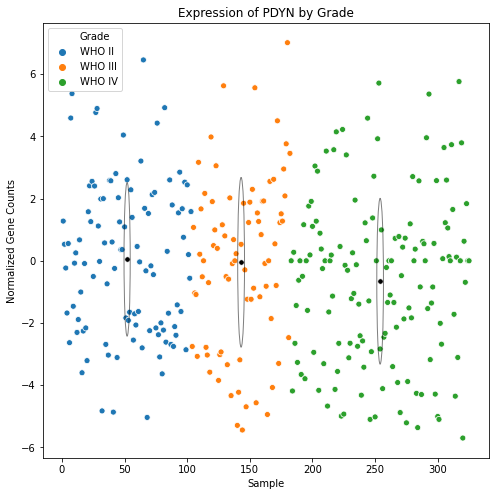

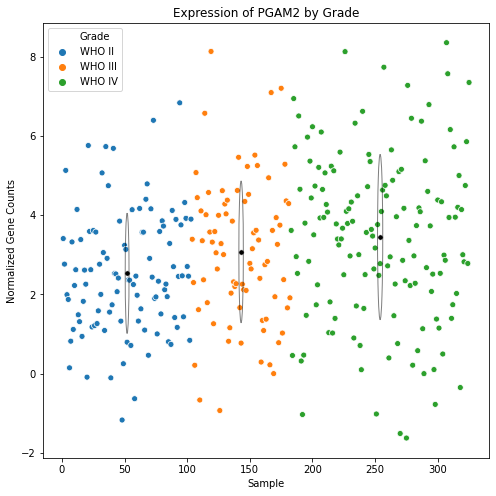

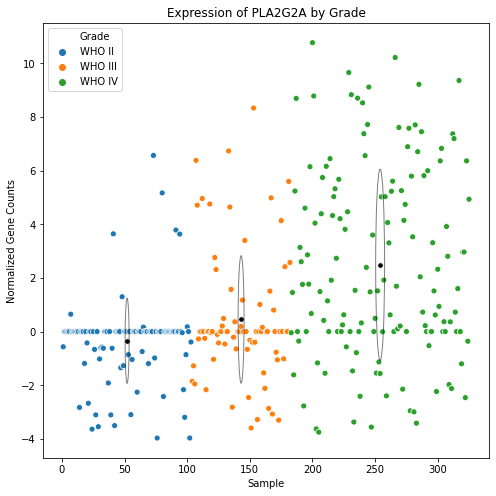

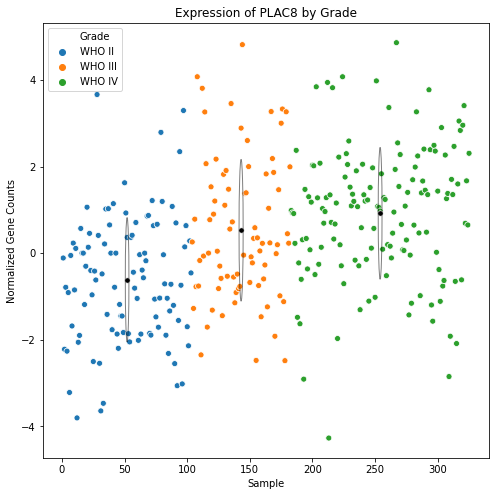

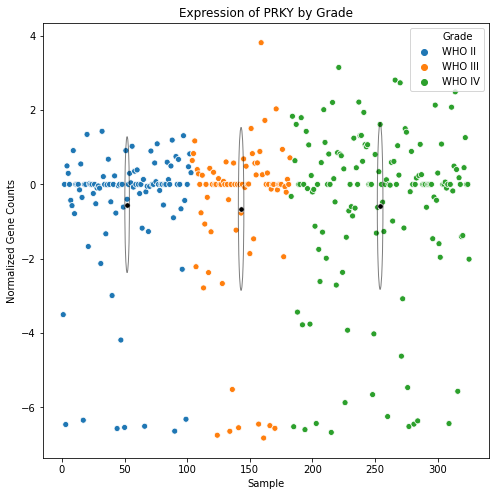

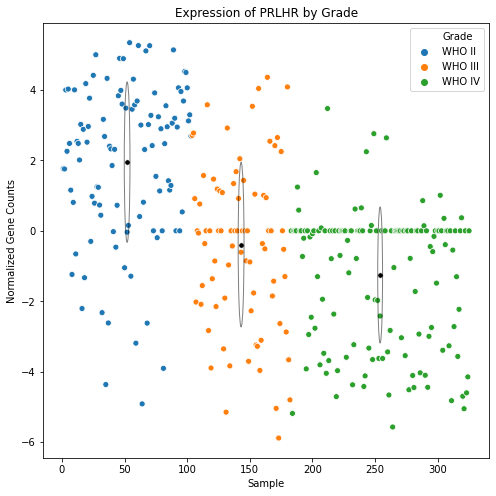

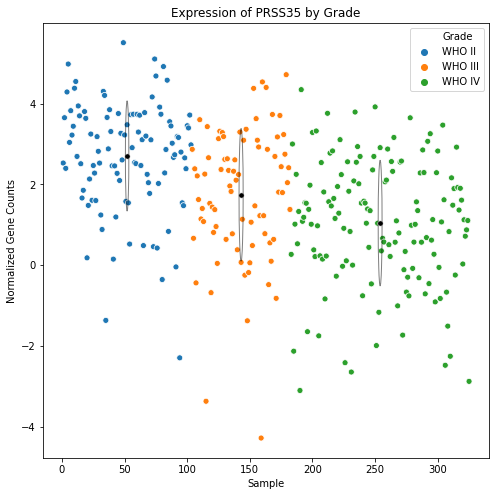

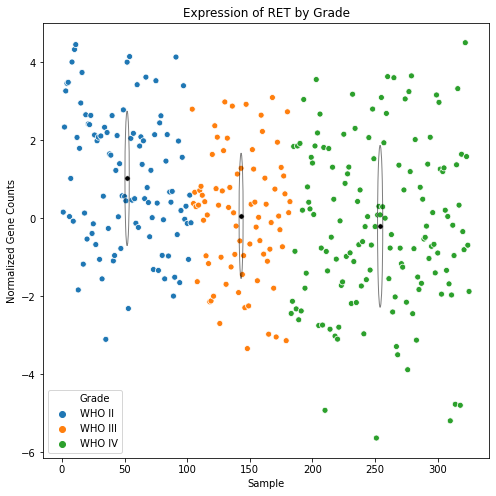

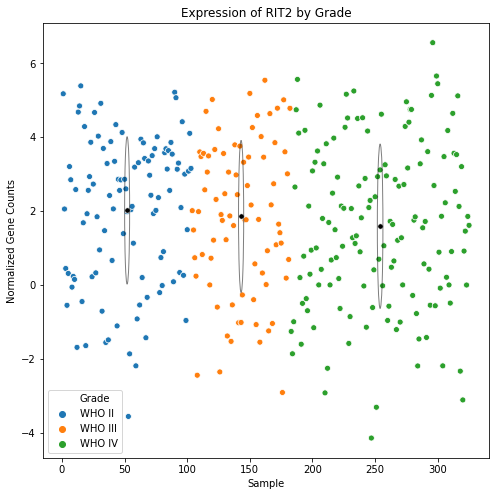

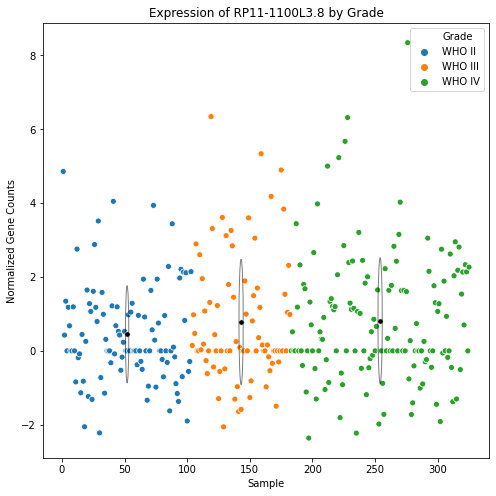

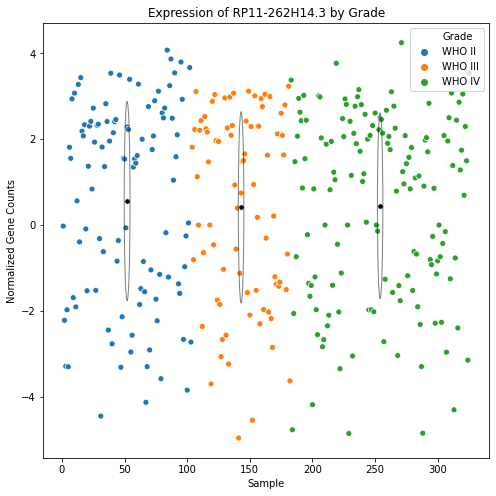

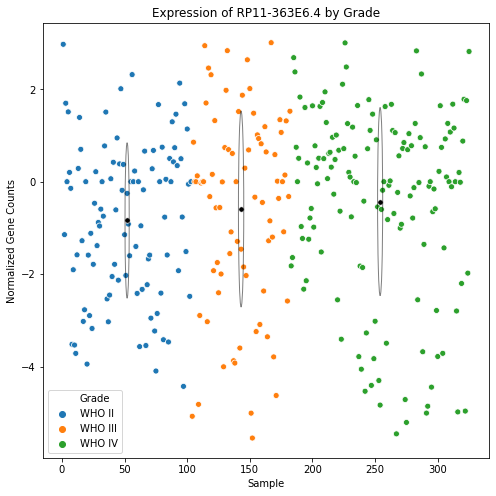

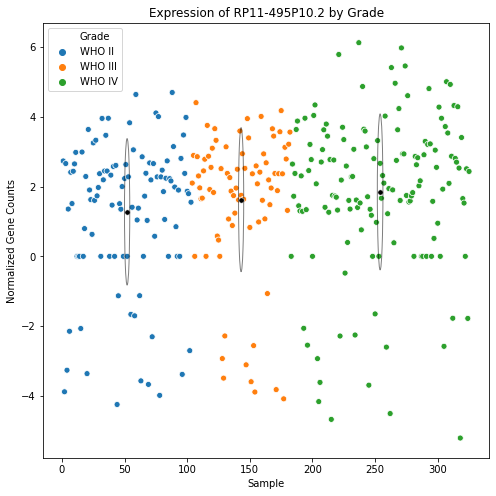

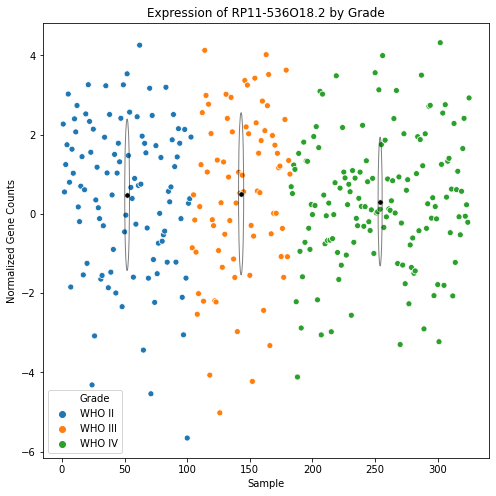

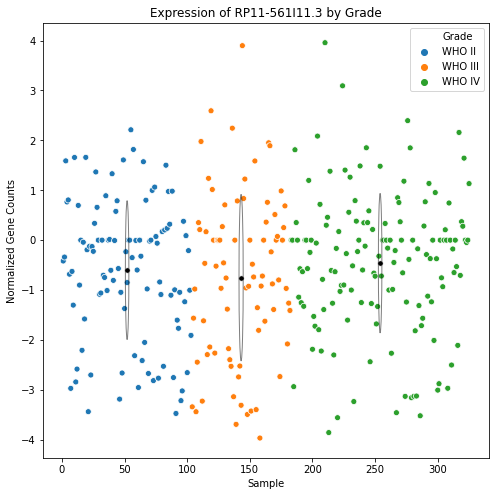

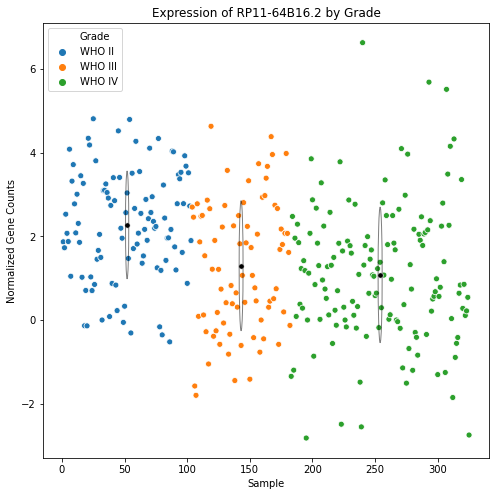

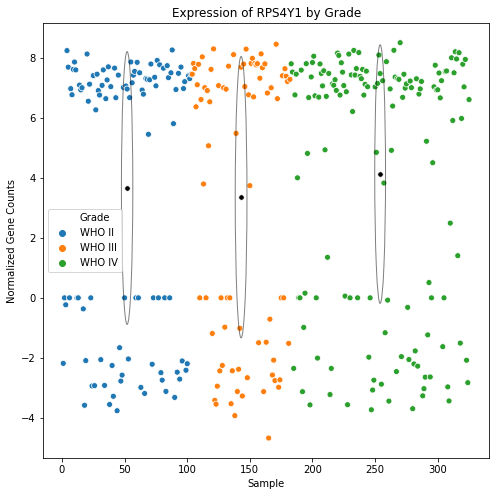

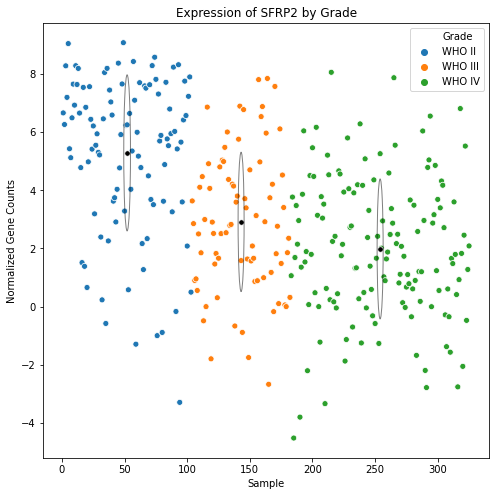

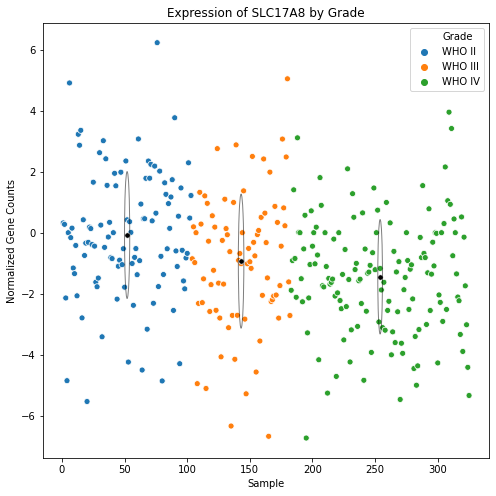

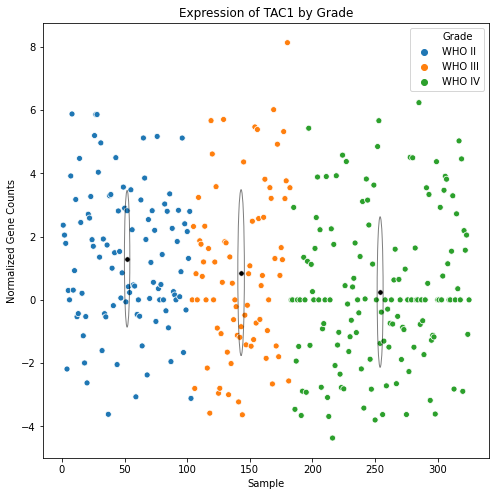

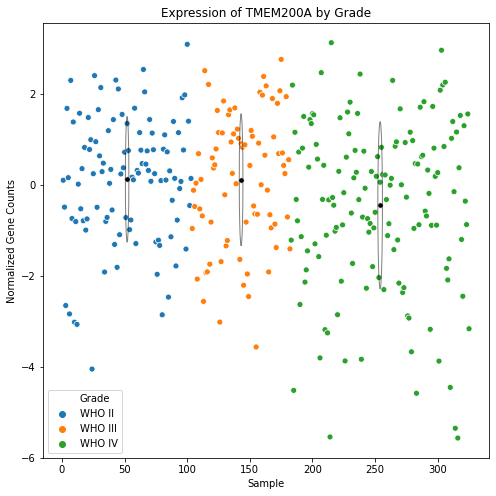

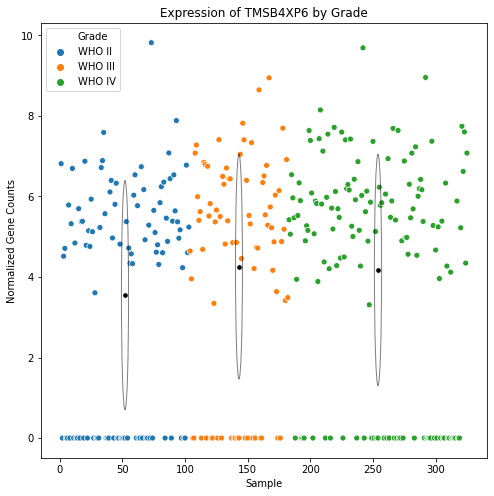

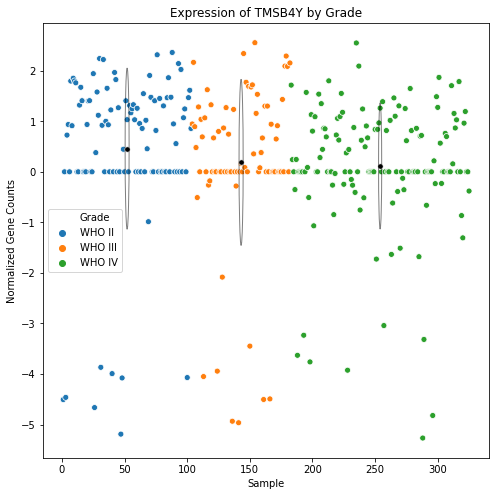

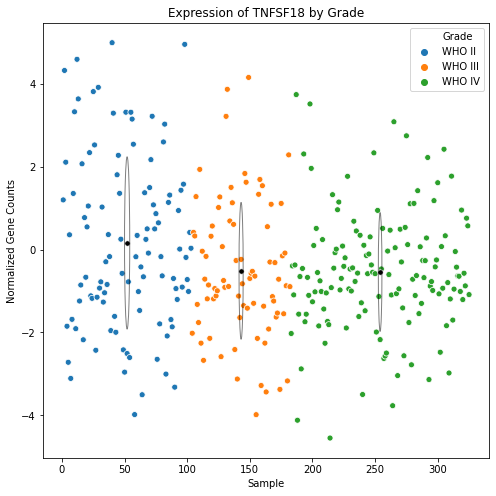

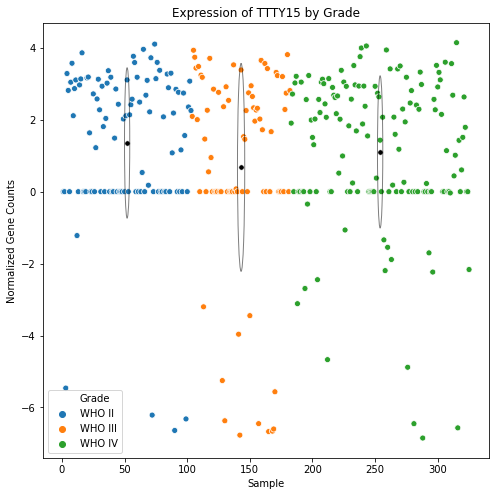

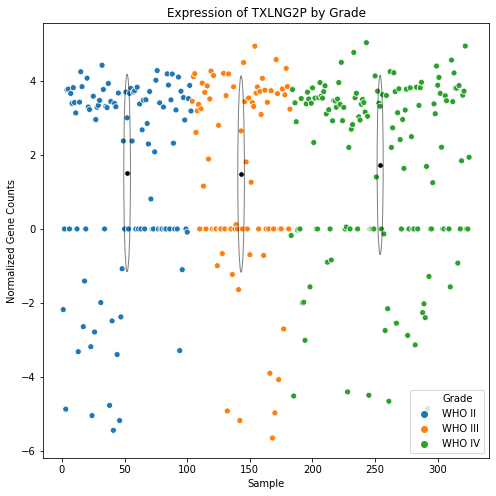

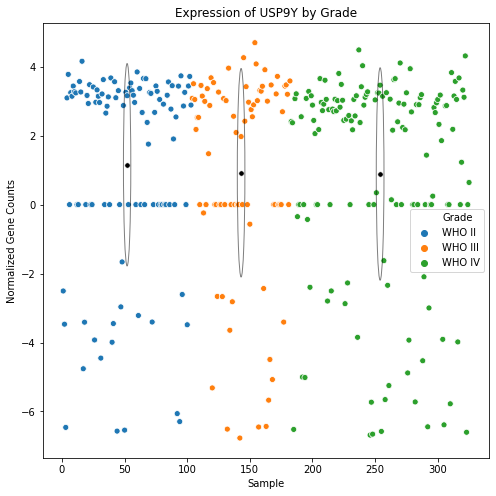

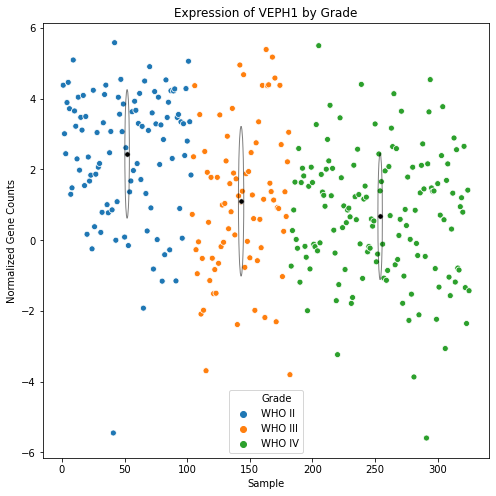

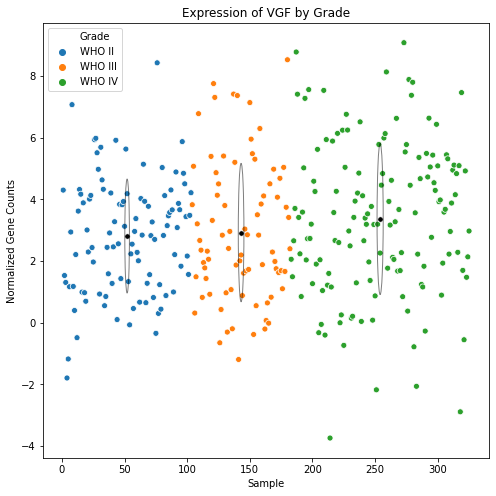

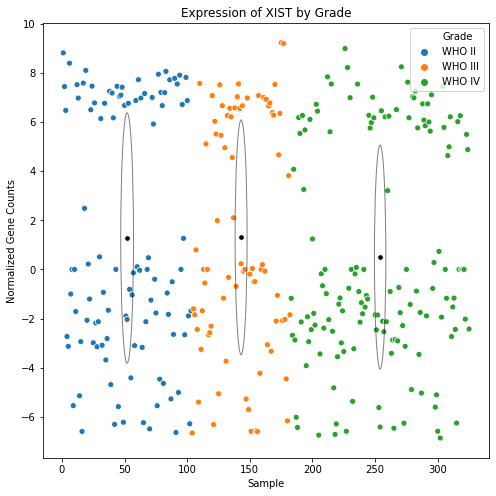

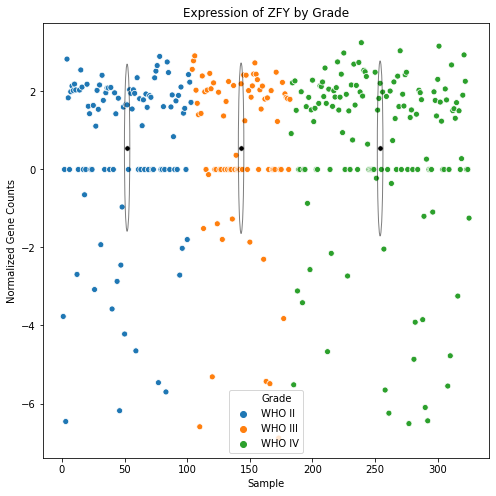

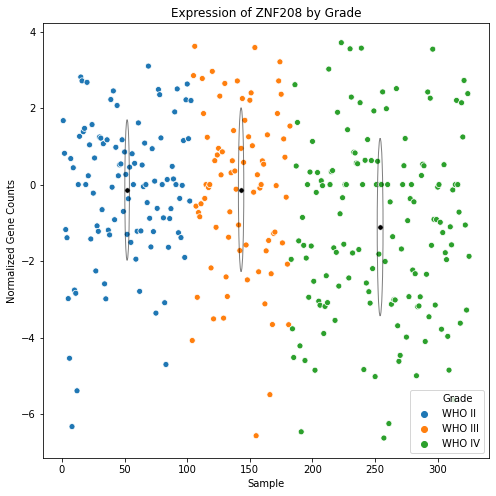

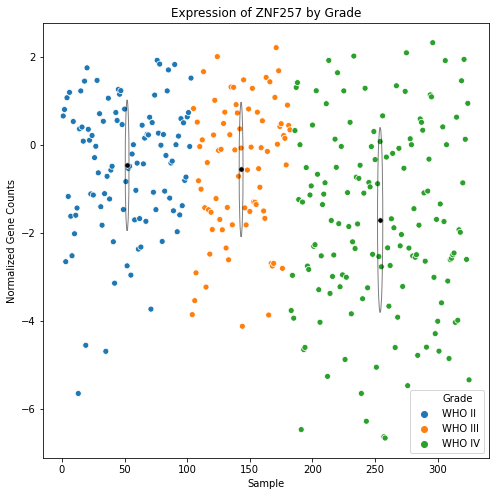

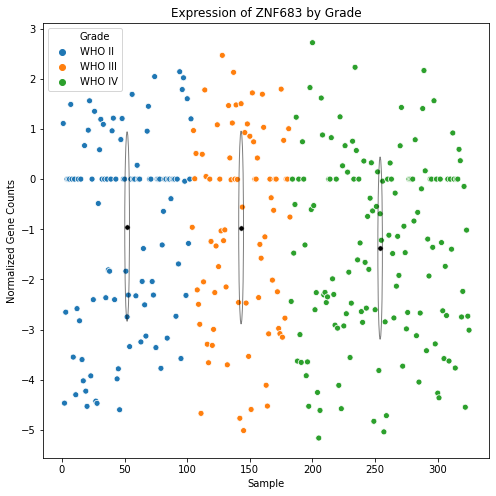

In [14]:
for i in top_indices:
    x = range(1, 326)
    y = processed_data['{}'.format(i)]

    fig = plt.figure(figsize = (8,8))
    axes = fig.add_subplot(111)

    sb.scatterplot(x , y, hue = processed_data['Grade'],  
                  hue_order = ['WHO II', 'WHO III', 'WHO IV'])

    axes.add_patch( patches.Circle( xy = (52, means.loc['WHO II','{}'.format(i)]), 
                                  radius = std.loc['WHO II','{}'.format(i)], 
                                  facecolor = 'none', edgecolor = 'k', alpha = .5) )
    axes.add_patch( patches.Circle( xy = (143, means.loc['WHO III','{}'.format(i)]), 
                                  radius = std.loc['WHO III','{}'.format(i)], 
                                  facecolor = 'none', edgecolor = 'k', alpha = .5) )
    axes.add_patch( patches.Circle( xy = (254, means.loc['WHO IV','{}'.format(i)]), 
                                  radius = std.loc['WHO IV','{}'.format(i)], 
                                  facecolor = 'none', edgecolor = 'k', alpha = .5) )
    sb.scatterplot([52, 143, 254] , means['{}'.format(i)] , color = 'black', s = 30)
    plt.xlabel('Sample')
    plt.ylabel('Normalized Gene Counts')
    plt.title("Expression of {} by Grade".format(gene_data.iloc[i,0]))
    plt
    plt.show()

# Top Genes on Run # 2

## Get Gene Names

In [0]:
top_indices = [ 1295 , 4082 , 7350, 19766 ,22242]

In [16]:
gene_names = []
for i in top_indices:
    gene_names.append(gene_data.iloc[i, 0])
gene_names

['AIFM3', 'CES4A', 'FBXO2', 'SERPINI1', 'TPPP3']

# Plot gene expression by Grades

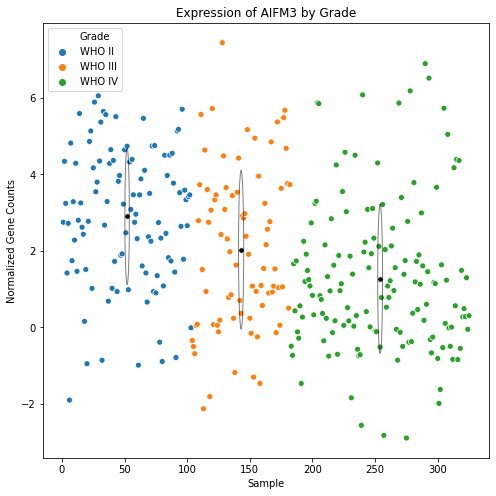

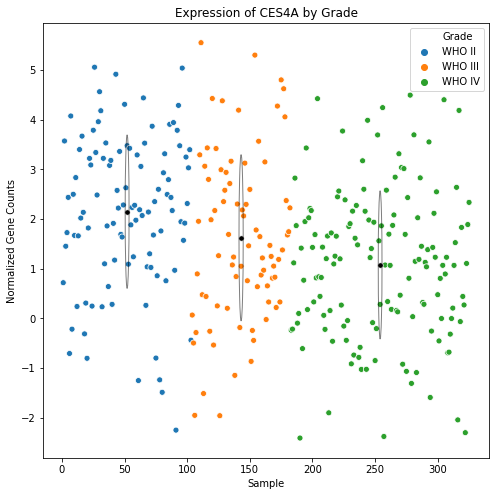

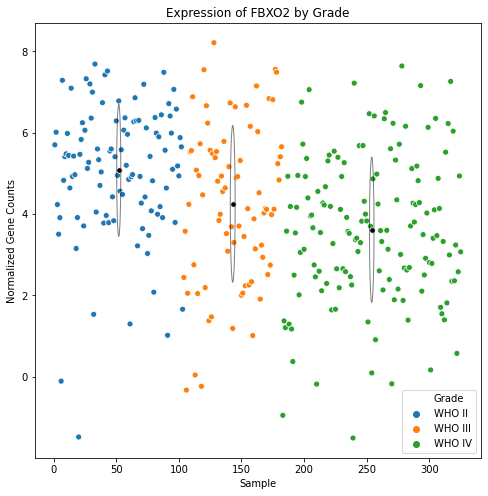

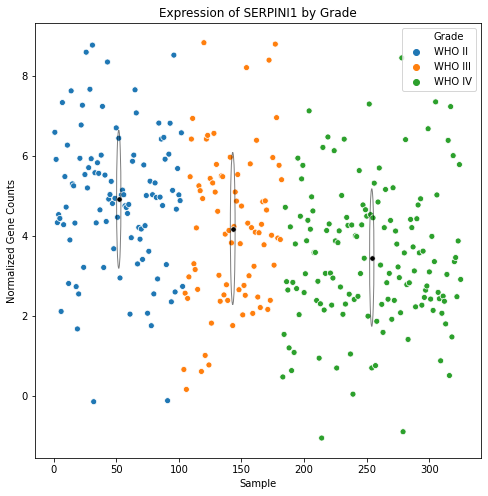

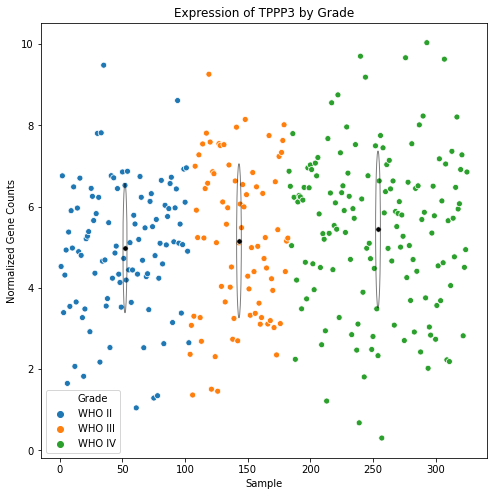

In [17]:
for i in top_indices:
    x = range(1, 326)
    y = processed_data['{}'.format(i)]

    fig = plt.figure(figsize = (8,8))
    axes = fig.add_subplot(111)

    sb.scatterplot(x , y, hue = processed_data['Grade'],  
                  hue_order = ['WHO II', 'WHO III', 'WHO IV'])

    axes.add_patch( patches.Circle( xy = (52, means.loc['WHO II','{}'.format(i)]), 
                                  radius = std.loc['WHO II','{}'.format(i)], 
                                  facecolor = 'none', edgecolor = 'k', alpha = .5) )
    axes.add_patch( patches.Circle( xy = (143, means.loc['WHO III','{}'.format(i)]), 
                                  radius = std.loc['WHO III','{}'.format(i)], 
                                  facecolor = 'none', edgecolor = 'k', alpha = .5) )
    axes.add_patch( patches.Circle( xy = (254, means.loc['WHO IV','{}'.format(i)]), 
                                  radius = std.loc['WHO IV','{}'.format(i)], 
                                  facecolor = 'none', edgecolor = 'k', alpha = .5) )
    sb.scatterplot([52, 143, 254] , means['{}'.format(i)] , color = 'black', s = 30)
    plt.xlabel('Sample')
    plt.ylabel('Normalized Gene Counts')
    plt.title("Expression of {} by Grade".format(gene_data.iloc[i,0]))
    plt
    plt.show()